# Importing Libraries

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Loading Data

## Selecting Database

In [2]:
# List of JSON files
json_files = ['Datasets/FVC2002.json']
df = pd.read_json(json_files[0],orient='records')

## Storing the dataframe as a list of fingerprints in the fingerprint array

In [3]:
fingerprint = []
for entry in range(len(df)):
    fingerprint.append(pd.DataFrame(df.iloc[entry]['mv'], columns=['x', 'y', 'flag', 'value']))

In [12]:
len(df['mv'][0])

49

In [5]:
# perform delaunay triangulation on fingerprint[0]
# x coordinates are in fingerprint[0]['x']
# y coordinates are in fingerprint[0]['y']

# create a list of points
points = []
minutiae = []
for i in range(len(fingerprint[0])):
    points.append([fingerprint[0]['x'][i], fingerprint[0]['y'][i]])
    minutiae.append([fingerprint[0]['x'][i], fingerprint[0]['y'][i], fingerprint[0]['value'][i]])

# perform delaunay triangulation
tri = Delaunay(points)

In [16]:
len(tri.simplices)

86

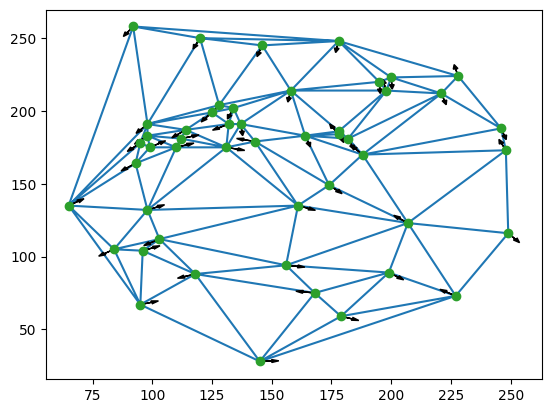

In [17]:
# plot the triangulation
# plot minutaie points
# third parameter is angle in radians
# draw a pointer at minutiae points
plt.triplot(*zip(*points), tri.simplices.copy())
plt.plot(*zip(*points), 'o')
for i in range(len(minutiae)):
    plt.arrow(minutiae[i][0], minutiae[i][1], 5*np.cos(minutiae[i][2]), 5*np.sin(minutiae[i][2]), head_width=2, head_length=3, fc='k', ec='k')
plt.show()

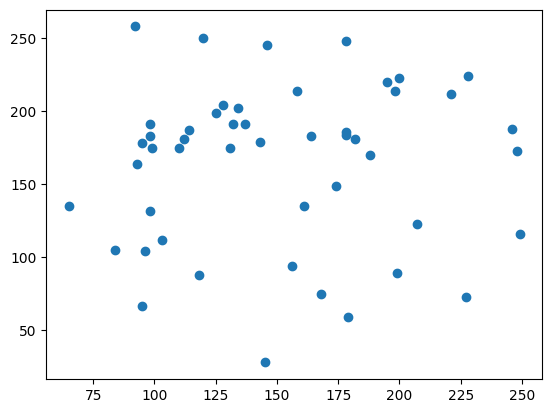

In [18]:
# plot the points after unraveling the tuples
plt.plot(*zip(*points), 'o')
plt.show()

In [15]:
tri.simplices.shape

(86, 3)

In [ ]:
# create a tuple of points for each triangle
triangles = []
for i in range(len(tri.simplices)):
    triangles.append([minutiae[tri.simplices[i][0]], minutiae[tri.simplices[i][1]], minutiae[tri.simplices[i][2]]])

triangles

In [20]:
# myfunc takes 3 minutiae points as input and returns the area
# of the triangle formed by these 3 points
def myfunc(x):
    return 0.5*np.abs(x[0][0]*(x[1][1]-x[2][1]) + x[1][0]*(x[2][1]-x[0][1]) + x[2][0]*(x[0][1]-x[1][1]))

In [ ]:
# pass each triangle to a function myfunc

arr = []
for i in range(len(triangles)):
    print(triangles[i])
    arr.append([myfunc(triangles[i]), triangles[i]])
    print(arr[i])

In [ ]:
# sort arr in ascending order
arr.sort()
arr

In [ ]:
# import functions.py for helper functions
import functions as fn

# call ret_arr function to extract and return indirect feature vector array
# ret_arr function takes arr as input

final_arr = fn.ret_arr(triangles)

In [28]:
# print max of final_arr
final_arr[1]

[-4.969973692088094,
 1.1064282568236445,
 1.5374099158581966,
 1.6929291027774043]

In [ ]:
final_arr

In [26]:
triangles[0]

[[98, 191, 0.9272952180016123],
 [92, 258, 1.034500617885937],
 [65, 135, 0.6361486976043581]]